In [ ]:
#                 model 1 -> weak learner
#                 input -> features in dataset
# step 1 -> take the mean of the label
# step 2 -> find the residuals 
#             residual = actual value - predicted value 
#                 model 2
#                 input - > features in dataset
#                 target - > above residual
# step -> predict the value 
#         it give residuals values 
        
        
        
#         final prediction 
#         y_pred = m1 + n*m2   (n-> Learning rate)                

### Importing the Required Frameworks

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeRegressor

### Creating the Dataset

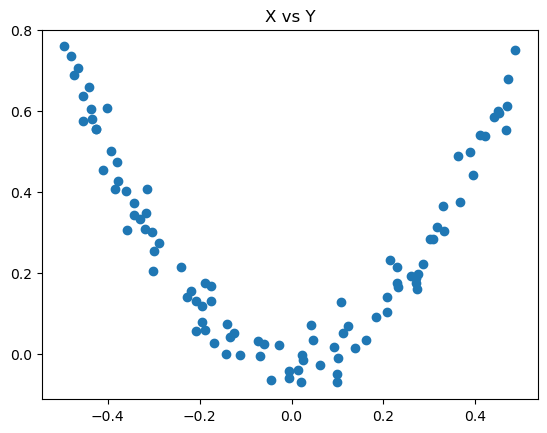

In [2]:
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3 * X[:, 0]**2 + 0.05 * np.random.randn(100)

df = pd.DataFrame()
df['X'] = X.reshape(100)
df['y'] = y

plt.scatter(df['X'], df['y'])
plt.title('X vs Y')
plt.show()

### Step 1: Initial Prediction with Mean Value (Model m1)

In [3]:
df['pred1'] = df['y'].mean()

In [4]:
df

,X,y,pred1
0,-0.125460,0.051573,0.265458
1,0.450714,0.594480,0.265458
2,0.231994,0.166052,0.265458
3,0.098658,-0.070178,0.265458
4,-0.343981,0.343986,0.265458
...,...,...,...
95,-0.006204,-0.040675,0.265458
96,0.022733,-0.002305,0.265458
97,-0.072459,0.032809,0.265458
98,-0.474581,0.689516,0.265458


### Step 2: Calculating Pseudo-Residuals

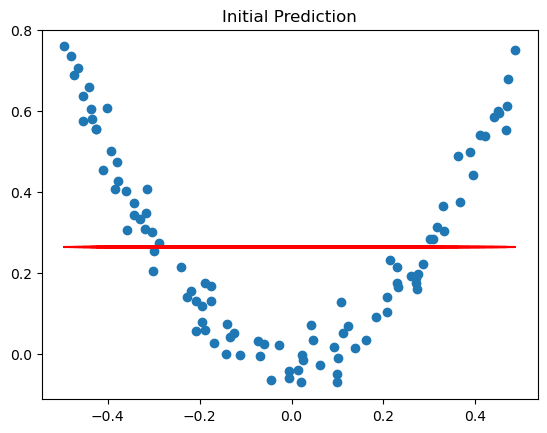

In [5]:
df['res1'] = df['y'] - df['pred1']

plt.scatter(df['X'], df['y'])
plt.plot(df['X'], df['pred1'], color='red')
plt.title('Initial Prediction')
plt.show()

In [6]:
df

,X,y,pred1,res1
0,-0.125460,0.051573,0.265458,-0.213885
1,0.450714,0.594480,0.265458,0.329021
2,0.231994,0.166052,0.265458,-0.099407
3,0.098658,-0.070178,0.265458,-0.335636
4,-0.343981,0.343986,0.265458,0.078528
...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133
96,0.022733,-0.002305,0.265458,-0.267763
97,-0.072459,0.032809,0.265458,-0.232650
98,-0.474581,0.689516,0.265458,0.424057


### Step 3: Building the Second Model (m2)

In [7]:
tree1 = DecisionTreeRegressor(max_leaf_nodes=8)
tree1.fit(df['X'].values.reshape(100, 1), df['res1'].values)

DecisionTreeRegressor(max_leaf_nodes=8)

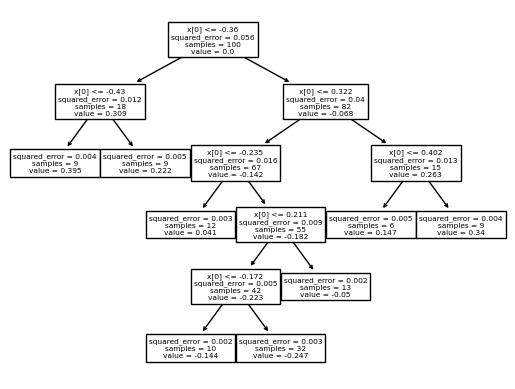

In [8]:
from sklearn.tree import plot_tree
plot_tree(tree1)
plt.show()

### Step 4: Updating Predictions (Model m2)

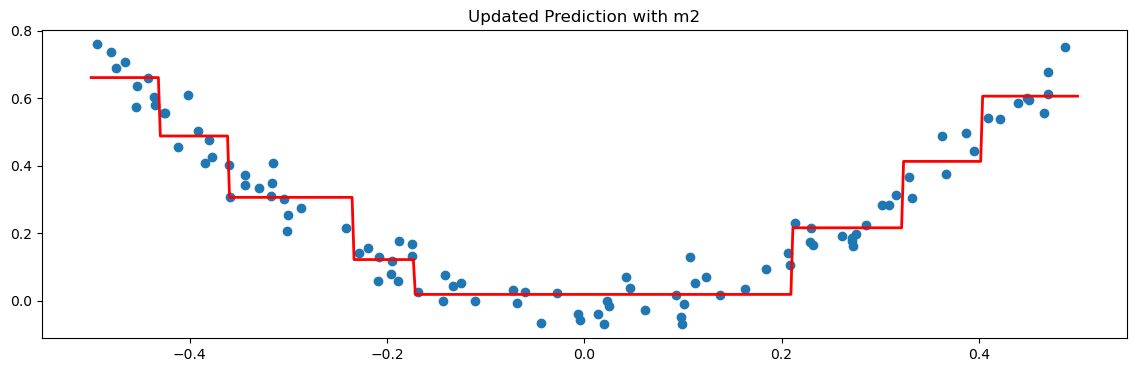

In [9]:
X_test = np.linspace(-0.5, 0.5, 500)
y_pred = df['pred1'].iloc[0] + tree1.predict(X_test.reshape(500, 1))

plt.figure(figsize=(14, 4))
plt.plot(X_test, y_pred, linewidth=2, color='red')
plt.scatter(df['X'], df['y'])
plt.title('Updated Prediction with m2')
plt.show()

### Step 5: Adding a Third Model (m3)

In [10]:
df['pred2'] = df['pred1'].iloc[0] + tree1.predict(df['X'].values.reshape(100, 1))
df['res2'] = df['y'] - df['pred2']

tree2 = DecisionTreeRegressor(max_leaf_nodes=8)
tree2.fit(df['X'].values.reshape(100, 1), df['res2'].values)

DecisionTreeRegressor(max_leaf_nodes=8)

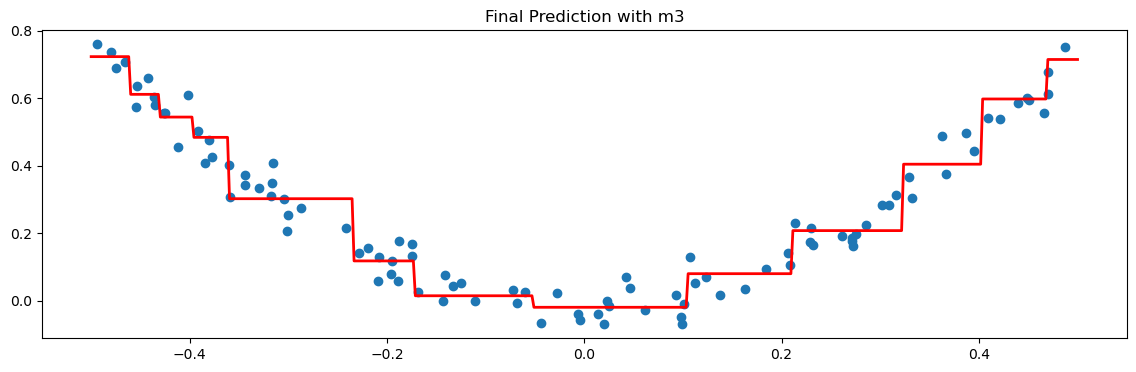

In [11]:
y_pred = df['pred1'].iloc[0] + tree1.predict(X_test.reshape(500, 1)) + tree2.predict(X_test.reshape(500, 1))

plt.figure(figsize=(14, 4))
plt.plot(X_test, y_pred, linewidth=2, color='red')
plt.scatter(df['X'], df['y'])
plt.title('Final Prediction with m3')
plt.show()

In [12]:
# Conclusion
# In this tutorial, we've intentionally used three models (m1, m2, m3) to demonstrate how gradient boosting works. Each model successively improves the prediction by focusing on the errors of the previous model. The learning rate is set to 1 for simplicity, but in practice, it's usually set to a lower value like 0.1 to prevent overfitting.

# In a real-world application, gradient boosting would typically involve many more models (often hundreds), automatically generated and optimized by the algorithm. The process remains the same: each new model tries to correct the errors of its predecessors, resulting in a highly accurate final prediction.

# Understanding the step-by-step implementation of gradient boosting helps in grasping how this powerful technique improves predictive models, especially in complex, nonlinear scenarios.

